In [75]:
pip install scikit-plot
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scikitplot as skplt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_fscore_support as score
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [62]:
#loadi the data
df = pd.read_csv('penguins.csv')
df=df.dropna()
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [63]:
# data and lable 
data = np.asarray(df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])
lable = np.asarray(df['species'])


In [64]:
#partition
data_train, data_test, lable_train, lable_test = train_test_split(data, lable, test_size=0.2)



In [65]:
# data_train.fillna(data_train.mean(), inplace=True)
# data_test.fillna(data_test.mean(), inplace=True)

#model fitting
L = LogisticRegression(C=0.01, solver='liblinear')
L.fit(data_train,lable_train)
#result prediction
res = L.predict(data_test)



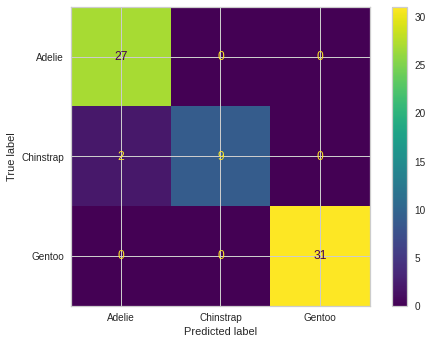

In [117]:
#confusion_matrix
cm = metrics.confusion_matrix(lable_test, res)
cm_d = metrics.ConfusionMatrixDisplay(cm,display_labels=['Adelie', 'Chinstrap' ,'Gentoo'])
cm_d.plot()
plt.show()

In [116]:
precision, recall, fscore, support = score(lable_test, res)

chart = PrettyTable(['Label', 'Precision', 'Recall'])
chart.add_row(['Adelie', round(precision[0]*100, 2), round(recall[0]*100, 2)])
chart.add_row(['Chinstrap', round(precision[1]*100, 2), round(recall[1]*100, 2)])
chart.add_row(['Gentoo', round(precision[2]*100, 2), round(recall[2]*100, 2)])
print(chart)

+-----------+-----------+--------+
|   Label   | Precision | Recall |
+-----------+-----------+--------+
|   Adelie  |    93.1   | 100.0  |
| Chinstrap |   100.0   | 81.82  |
|   Gentoo  |   100.0   | 100.0  |
+-----------+-----------+--------+


In [118]:
#accuracy
acc = accuracy_score(lable_test, res)
acc

0.9710144927536232

In [123]:

from  yellowbrick.classifier import ROCAUC

def plot_ROC_curve(xtrain, ytrain, xtest, ytest):

# Creating visualization with the readable labels
    visualizer = ROCAUC(LogisticRegression, encoder={0: 'Adelie', 1: 'Chinstrap ', 2: 'Gentoo'})
                                        
# Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer
    
plot_ROC_curve(data_train, lable_train, data_test, lable_test)

ModelError: ignored